###### Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.preliminary data analysis

In [2]:
df=pd.read_excel("1645792390_cep1_dataset.xlsx")

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df['trestbps'].head()

0    145
1    130
2    130
3    120
4    120
Name: trestbps, dtype: int64

checking for the duplicates

In [7]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking the null values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: >

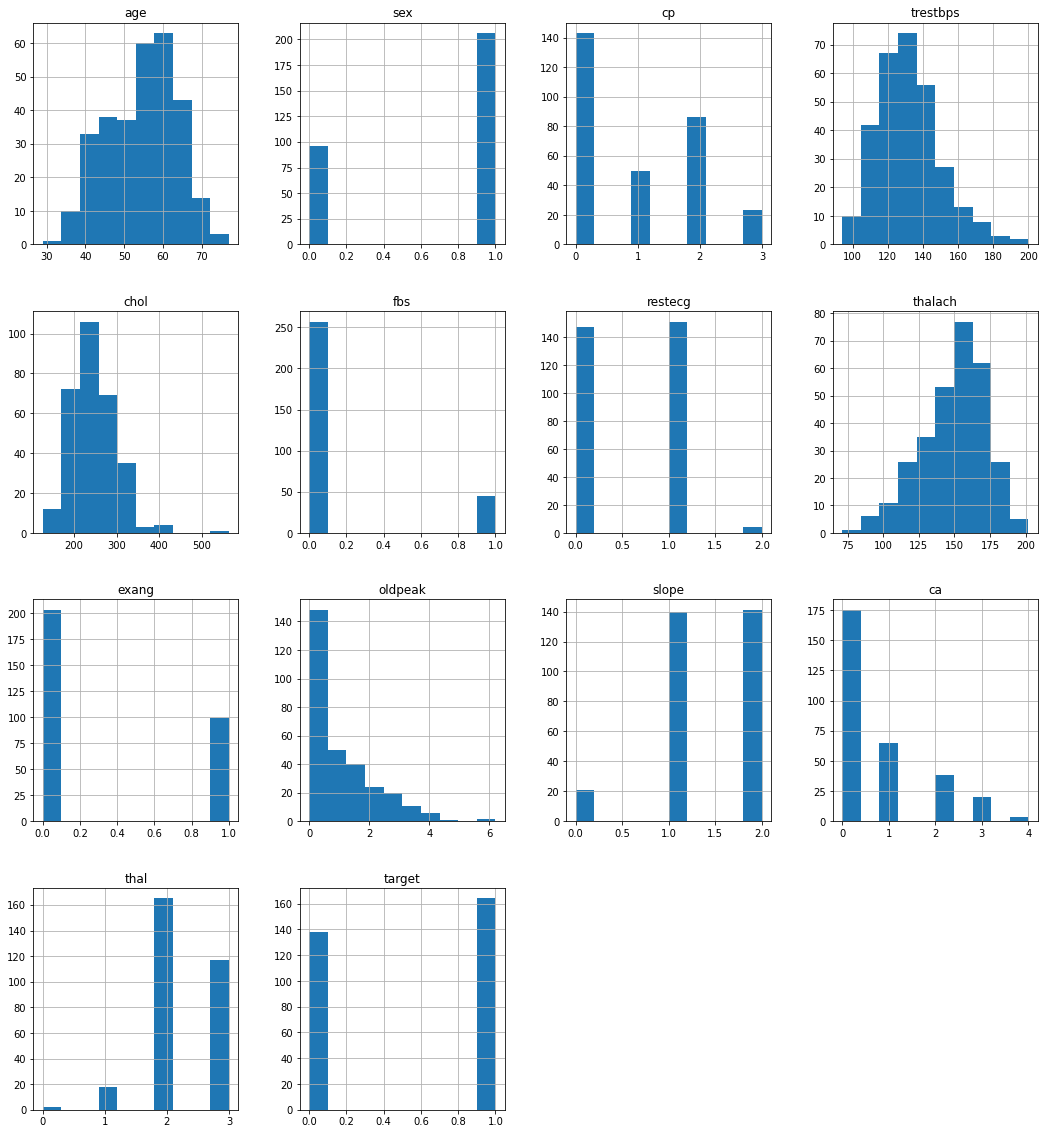

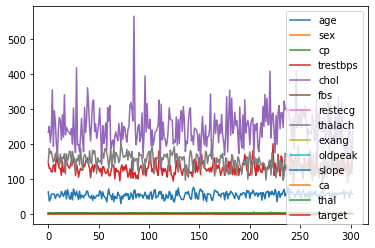

In [9]:
df.hist(figsize=(18,20))
df.plot()

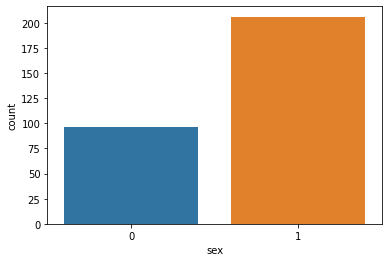

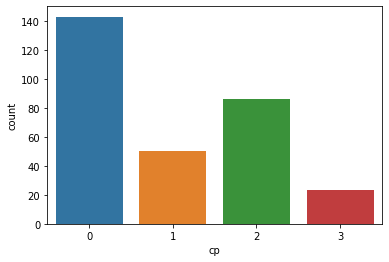

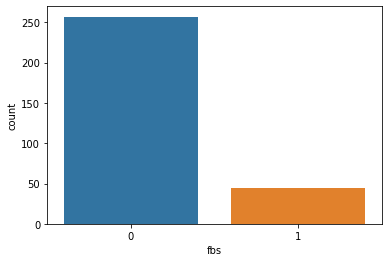

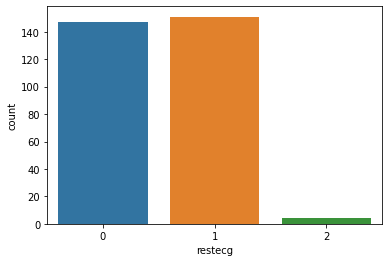

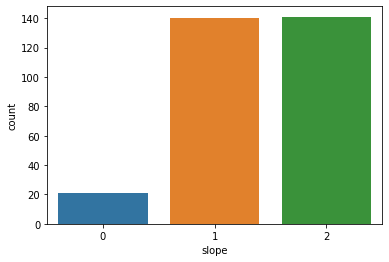

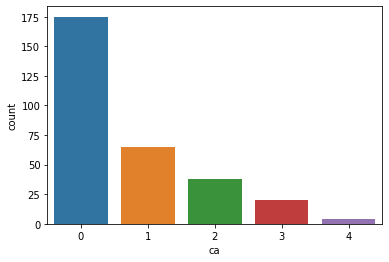

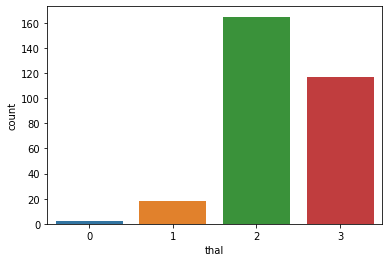

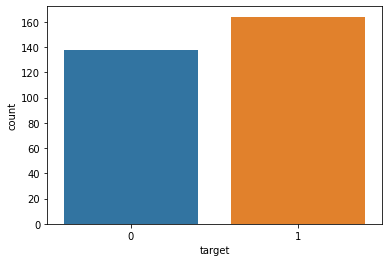

In [10]:
# Categorical Variable Exploration
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'target']
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.show()

<AxesSubplot: >

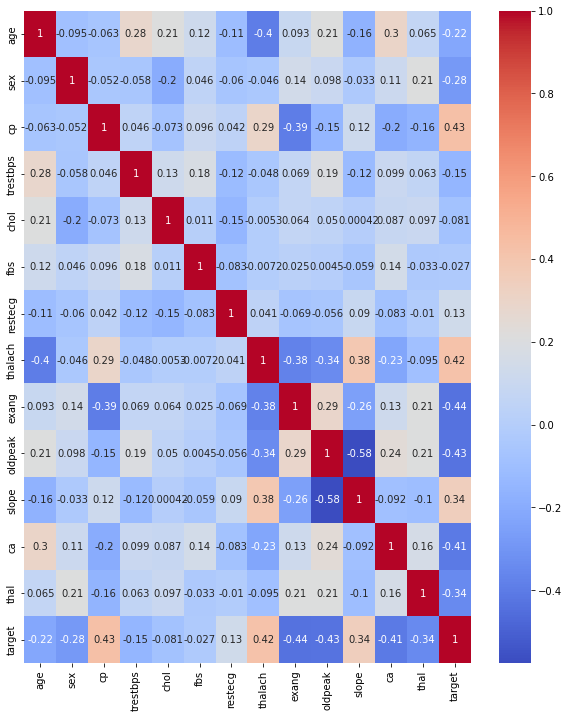

In [39]:
#Correlation among all the variables by heat map

plt.figure(figsize=(10, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )

cp and thalach has the highest correlation

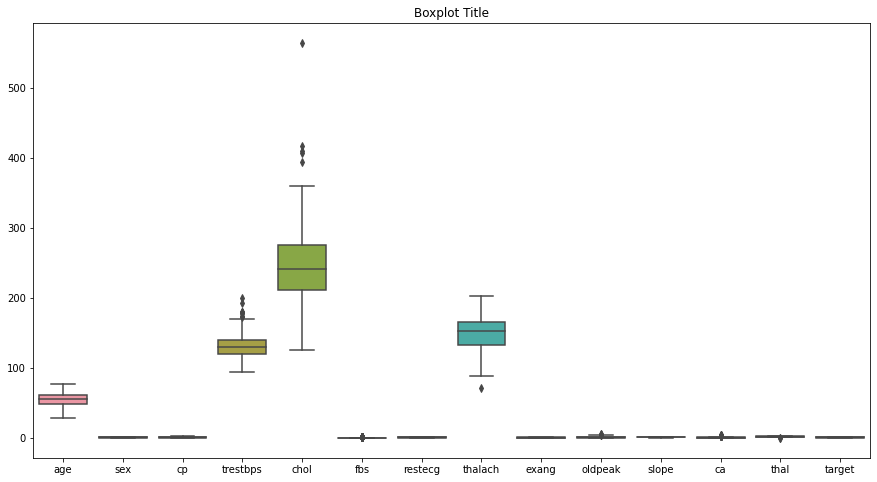

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, ax=ax)
ax.set_title("Boxplot Title")
plt.show()

In [13]:
#correlation between levels and a target variable

In [14]:
correlation = df['chol'].corr(df['target'])
correlation

-0.08143720051844129

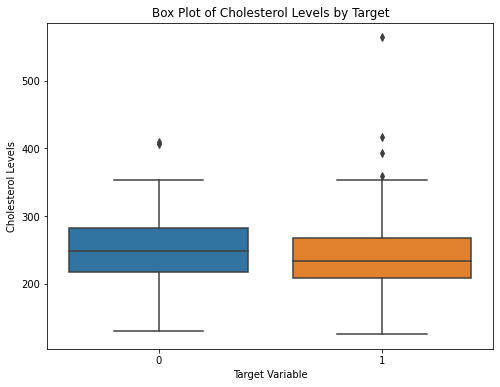

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol')
plt.xlabel('Target Variable')
plt.ylabel('Cholesterol Levels')
plt.title('Box Plot of Cholesterol Levels by Target')
plt.show()

In [16]:
#occurnce of target CVD accross Age 

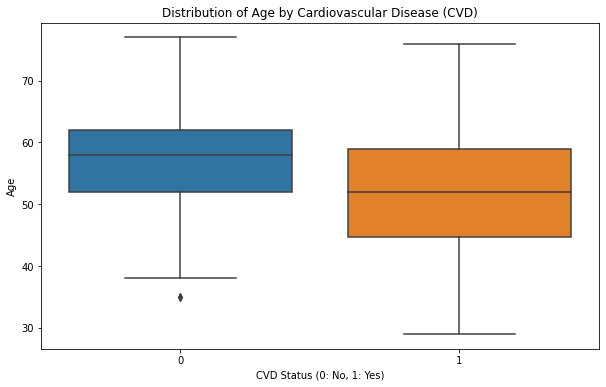

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribution of Age by Cardiovascular Disease (CVD)')
plt.xlabel('CVD Status (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

In [18]:
#State what relationship exists between peak exercising and the occurrence of a heart attack

In [19]:
from scipy.stats import chi2_contingency

In [20]:

from scipy.stats import chi2_contingencycontingency_table = pd.crosstab(df['slope'], df['target'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

# Report the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

print("Expected frequencies:", expected)


if p < 0.05:
    print("There is a significant association between peak exercising and the occurrence of a heart attack.")
else:
    print("There is no significant association between peak exercising and the occurrence of a heart attack.")

Chi-squared statistic: 46.889476601618135
P-value: 6.577782760917924e-11
Expected frequencies: [[ 9.59602649 11.40397351]
 [63.97350993 76.02649007]
 [64.43046358 76.56953642]]
There is a significant association between peak exercising and the occurrence of a heart attack.


In [21]:


# Create a contingency table
contingency_table = pd.crosstab(df['thal'], df['target'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Report the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Interpretation
if p < 0.05:
    print("Thalassemia is a significant cause of CVD.")
else:
    print("Thalassemia is not a significant cause of CVD.")

Chi-squared statistic: 84.61031794685029
P-value: 3.146295138318122e-18
Degrees of freedom: 3
Expected frequencies: [[ 0.91390728  1.08609272]
 [ 8.22516556  9.77483444]
 [75.39735099 89.60264901]
 [53.46357616 63.53642384]]
Thalassemia is a significant cause of CVD.


In [22]:
x = df.drop("target",axis=1)
y = df["target"]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
x = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]  # Include all the relevant predictor variables
y = df['target']  

# Fit the linear regression model
lm.fit(x, y)

# Get the coefficients of the variables
coefficients = lm.coef_
variables = x.columns

# Display the coefficients for each variable
for var, coef in zip(variables, coefficients):
   print(f"{var}: {coef}")
#

age: -0.0003928143818301868
sex: -0.1965009159650463
cp: 0.11075261200648671
trestbps: -0.0020950572302589994
chol: -0.00032622610413238136
fbs: 0.021805531931839813
restecg: 0.04776549115183675
thalach: 0.0030061849822255187
exang: -0.14441327605868023
oldpeak: -0.05722300544517783
slope: 0.07904441127166346
ca: -0.10752566158880086
thal: -0.11748109139783704


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)
print("Logistic Regression:")
print(classification_report(y_test, logistic_predictions))

#Accuracy is approx 88% by logistic regression algorithm


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Display random forest results
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))

#Accuracy is 86% by random forest algorithm


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

